In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("data/train.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

#### Смотрим зависимость цены от квадратных метров

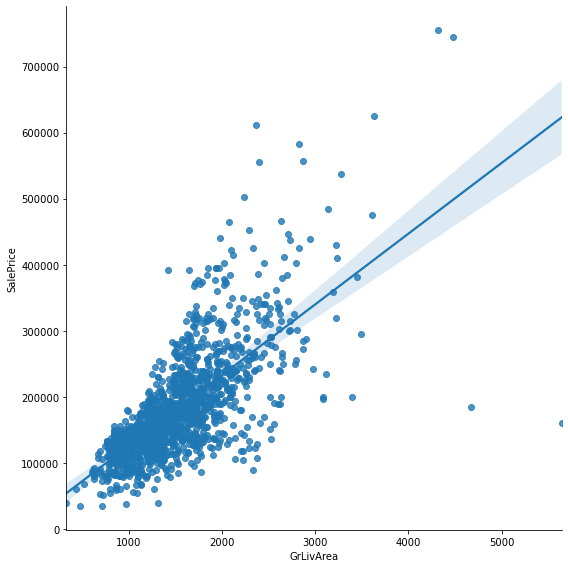

In [4]:
import seaborn as sns
from matplotlib import pyplot as plt
'GrLivArea - square meters'

sns.lmplot(x="GrLivArea", y="SalePrice",data=data, height=8)

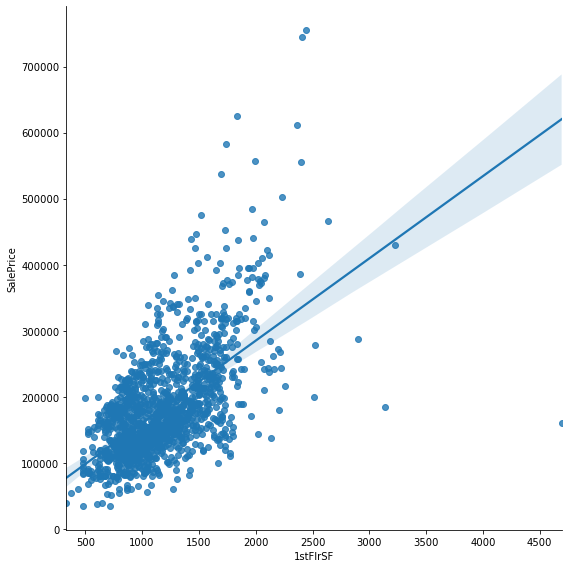

In [5]:
sns.lmplot(x="1stFlrSF", y="SalePrice",data=data, height=8)

In [6]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### Смотрим с какими фичами коррелирует цена

In [7]:
data.corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

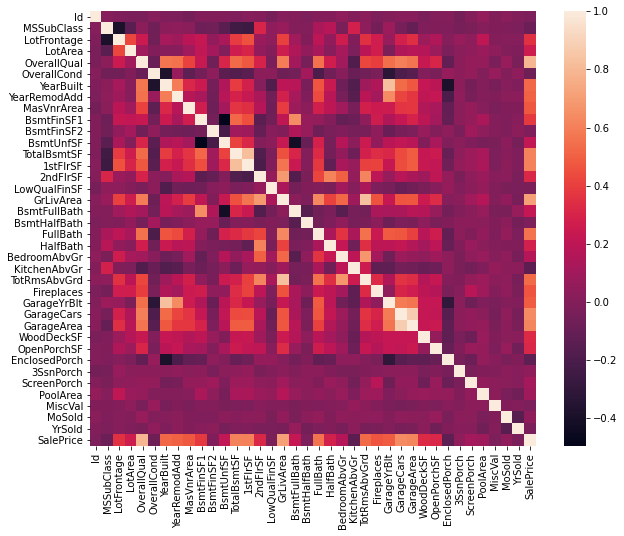

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr())

In [4]:
corr = data.corr()['SalePrice'].sort_values(ascending=False).index
data[corr]

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,...,BsmtFinSF2,BsmtHalfBath,MiscVal,Id,LowQualFinSF,YrSold,OverallCond,MSSubClass,EnclosedPorch,KitchenAbvGr
0,208500,7,1710,2,548,856,856,2,8,2003,...,0,0,0,1,0,2008,5,60,0,1
1,181500,6,1262,2,460,1262,1262,2,6,1976,...,0,1,0,2,0,2007,8,20,0,1
2,223500,7,1786,2,608,920,920,2,6,2001,...,0,0,0,3,0,2008,5,60,0,1
3,140000,7,1717,3,642,756,961,1,7,1915,...,0,0,0,4,0,2006,5,70,272,1
4,250000,8,2198,3,836,1145,1145,2,9,2000,...,0,0,0,5,0,2008,5,60,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,6,1647,2,460,953,953,2,7,1999,...,0,0,0,1456,0,2007,5,60,0,1
1456,210000,6,2073,2,500,1542,2073,2,7,1978,...,163,0,0,1457,0,2010,6,20,0,1
1457,266500,7,2340,1,252,1152,1188,2,9,1941,...,0,0,2500,1458,0,2010,9,70,0,1
1458,142125,5,1078,1,240,1078,1078,1,5,1950,...,1029,0,0,1459,0,2010,6,20,112,1


#### Объединяем квадратные метры для более полной картины

In [5]:
'adding all square'
data['total_square'] = data['GarageArea']+data['1stFlrSF']+data['2ndFlrSF']+data['TotalBsmtSF']+data['OpenPorchSF']+data['WoodDeckSF']

In [6]:
'adding bathrooms'
data['total_baths'] = data['TotalBsmtSF']+data['FullBath']+data['HalfBath']

In [7]:
# смотрим пустые колонки
data[corr].isnull().sum().sort_values(ascending=False).head(5) 

LotFrontage     259
GarageYrBlt      81
MasVnrArea        8
KitchenAbvGr      0
YearBuilt         0
dtype: int64

In [8]:
data['LotFrontage'] = data['LotFrontage'].fillna('Na')
data['GarageYrBlt'] = data['GarageYrBlt'].fillna('Na')
data['MasVnrArea'] = data['MasVnrArea'].fillna('Na')

или

In [14]:
#закодируем пропущенные значений строкой, факт пропущенного значения тоже может нести в себе информацию
data[corr] = data[corr].fillna('Na')

In [9]:
y = data[corr]['SalePrice']

In [10]:
#удалим y из X
data = data[corr].drop(['SalePrice'], axis=1)

In [11]:
data.isnull().sum().sort_values(ascending=False).head(5) 

KitchenAbvGr    0
OpenPorchSF     0
WoodDeckSF      0
LotFrontage     0
BsmtFinSF1      0
dtype: int64

In [12]:
#преобразуем данные в 0 и 1
data_OneHotEncoding = pd.get_dummies(data, drop_first=True)

In [13]:
data_OneHotEncoding.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,...,LotFrontage_149.0,LotFrontage_150.0,LotFrontage_152.0,LotFrontage_153.0,LotFrontage_160.0,LotFrontage_168.0,LotFrontage_174.0,LotFrontage_182.0,LotFrontage_313.0,LotFrontage_Na
0,7,1710,2,548,856,856,2,8,2003,2003,...,0,0,0,0,0,0,0,0,0,0
1,6,1262,2,460,1262,1262,2,6,1976,1976,...,0,0,0,0,0,0,0,0,0,0
2,7,1786,2,608,920,920,2,6,2001,2002,...,0,0,0,0,0,0,0,0,0,0
3,7,1717,3,642,756,961,1,7,1915,1970,...,0,0,0,0,0,0,0,0,0,0
4,8,2198,3,836,1145,1145,2,9,2000,2000,...,0,0,0,0,0,0,0,0,0,0


## Решаем задачу регрессии - предскажем цены на недвижимость

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(data_OneHotEncoding, y, test_size=0.25)

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_predictions = regressor.predict(X_test)

In [18]:
score = regressor.score(X_test, y_test)
print("Точноть предсказания: %.2f" % (score * 100) + ' %' )

Точноть предсказания: 58.85 %


In [19]:
from sklearn.tree import DecisionTreeRegressor

clf_tree = DecisionTreeRegressor(max_depth=15, min_samples_leaf=20)
clf_tree.fit(X_train, y_train)
score = clf_tree.score(X_test, y_test)

print("Точноть предсказания: %.2f" % (score * 100) + ' %' )

Точноть предсказания: 76.05 %


### Беггинг

In [20]:
from sklearn.ensemble import BaggingRegressor

bag_clf = BaggingRegressor(n_estimators=20, base_estimator=clf_tree, n_jobs=-1)
bag_clf.fit(X_train, y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=15,
                                                      min_samples_leaf=20),
                 n_estimators=20, n_jobs=-1)

In [21]:
score = bag_clf.score(X_test, y_test)
print("Точноть предсказания: %.2f" % (score * 100) + ' %' )

Точноть предсказания: 81.45 %


### Boosting

In [22]:
from sklearn.ensemble import GradientBoostingRegressor

boo_clf=GradientBoostingRegressor(n_estimators=20)
boo_clf.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=20)

In [23]:
score = boo_clf.score(X_test, y_test)
print("Точноть предсказания: %.2f" % (score * 100) + ' %' )

Точноть предсказания: 83.76 %


#### Boosting работает действительно лучше, чем Беггинг ))

### Cлучайный лес

In [24]:
from sklearn.ensemble import RandomForestRegressor

clf_rf = RandomForestRegressor(n_estimators=20, max_depth=5, min_samples_leaf=20, max_features=0.5, n_jobs=-1)
clf_rf.fit(X_train, y_train)
score = clf_rf.score(X_test, y_test)
print("Точноть предсказания: %.2f" % (score * 100) + ' %' )

Точноть предсказания: 81.40 %


### Важность признаков случайного леса

In [25]:
important = pd.Series(clf_rf.feature_importances_)

In [26]:
important.sort_values(ascending=False)

0      0.383756
1      0.223414
2      0.111598
5      0.055951
8      0.048911
         ...   
384    0.000000
385    0.000000
386    0.000000
387    0.000000
283    0.000000
Length: 568, dtype: float64

### Обучаю стекинг

Stacking - использования нескольких алгоритмов для решения одной задачи машинного обучения. Часто модель суммирования превосходит каждую из отдельных моделей из-за ее сглаживающей природы, компенсируя недостатки отдельных моделей, что приводит к лучшей производительности прогнозирования.Поэтому укладка работает лучше всего, когда базовые модели в основном разные.

In [78]:
from sklearn.ensemble import StackingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR

In [79]:
estimators = [
    ('dt', DecisionTreeRegressor()),
    ('lr_R', RidgeCV()),
    ('svr', LinearSVR(random_state=42))
]

In [80]:
classifier1 = StackingRegressor(
    estimators=estimators,
    final_estimator=RandomForestRegressor(n_estimators=10,random_state=42)
)

In [81]:
classifier1.fit(X_train, y_train).score(X_test, y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:974: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:974: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:974: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:974: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:974: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("L

0.8443727827066172

In [83]:
classifier1.named_estimators_['dt']

DecisionTreeRegressor()

In [84]:
#y_pred_proba_lr = classifier1.named_estimators_['lr'].predict(X_test)
y_pred_proba_dt = classifier1.named_estimators_['dt'].predict(X_test)
y_pred_proba_lr_R = classifier1.named_estimators_['lr_R'].predict(X_test)
y_pred_proba_svr = classifier1.named_estimators_['svr'].predict(X_test)

In [85]:
y_pred_proba = classifier1.predict(X_test)

In [86]:
classifier1.final_estimator_

RandomForestRegressor(n_estimators=10, random_state=42)

In [87]:
classifier2 = StackingRegressor(
    estimators=estimators,
    final_estimator=LinearRegression()
)

In [88]:
classifier2.fit(X_train, y_train).score(X_test, y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:974: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:974: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:974: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:974: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:974: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("L

0.683232125565162

In [89]:
classifier2.final_estimator_.coef_.flatten()

array([ 0.13735648,  0.89027189, -0.01709274])

In [90]:
pd.Series(classifier2.named_estimators_.keys())

0    (dt, lr_R, svr)
1    (dt, lr_R, svr)
2    (dt, lr_R, svr)
dtype: object

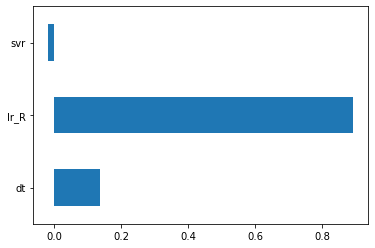

In [92]:
pd.Series(classifier2.final_estimator_.coef_.flatten(), index=classifier2.named_estimators_.keys()).plot(kind='barh')

In [94]:
estimators = [
    ('dt', DecisionTreeRegressor()),
    ('lr_R', RidgeCV()),
    ('svr', LinearSVR(random_state=42)),
    ('lr', LinearRegression())
]

In [95]:
classifier3 = StackingRegressor(
    estimators=estimators,
    final_estimator=LinearRegression()
)

In [96]:
classifier3.fit(X_train, y_train).score(X_test, y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:974: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:974: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:974: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:974: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:974: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("L

0.7214535694046333

In [98]:
classifier3.final_estimator_.coef_.flatten()

array([ 2.87587378e-01,  7.47805353e-01, -1.93296101e-02,  7.17266209e-07])

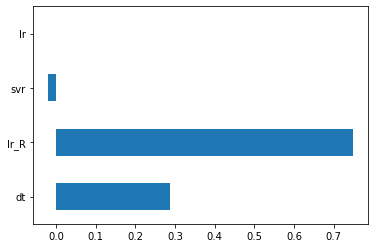

In [97]:
pd.Series(classifier3.final_estimator_.coef_.flatten(), index=classifier3.named_estimators_.keys()).plot(kind='barh')